In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [16]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [20]:
df.duplicated().sum()

25

In [3]:
df.drop_duplicates(inplace= True)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
flyash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseaggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineaggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
csMPa,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


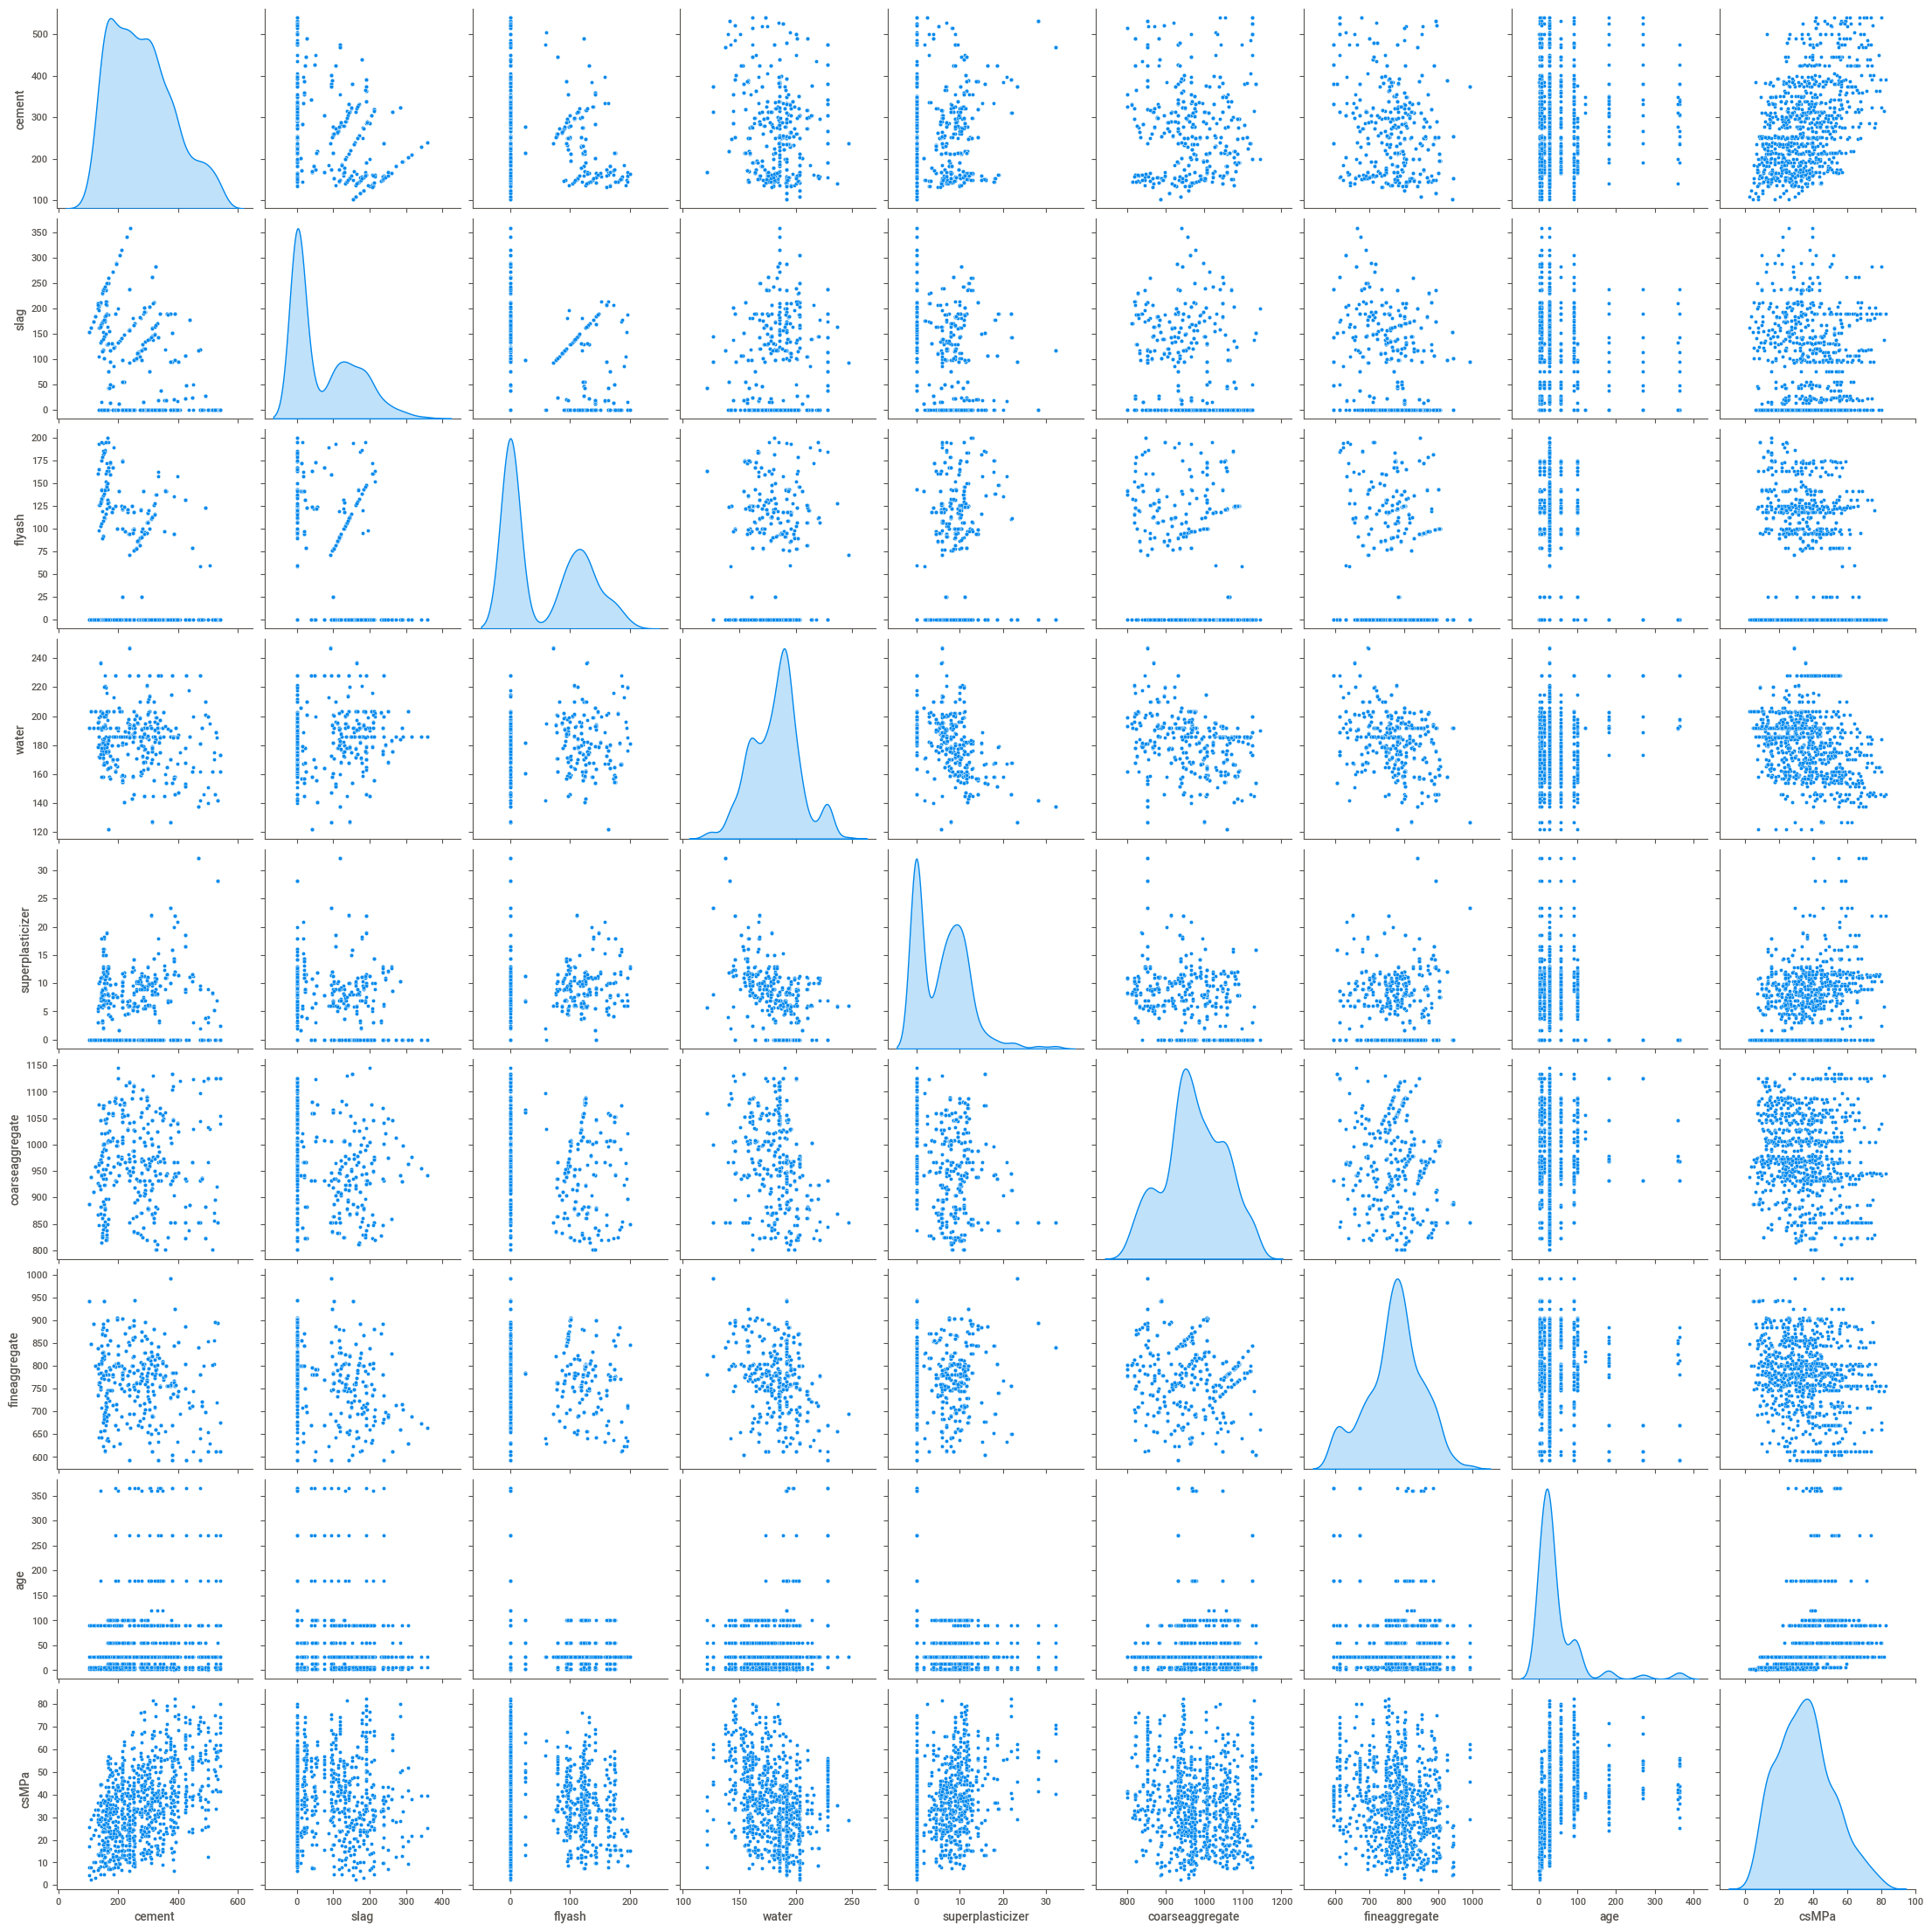

In [23]:
sns.pairplot(df,diag_kind='kde')

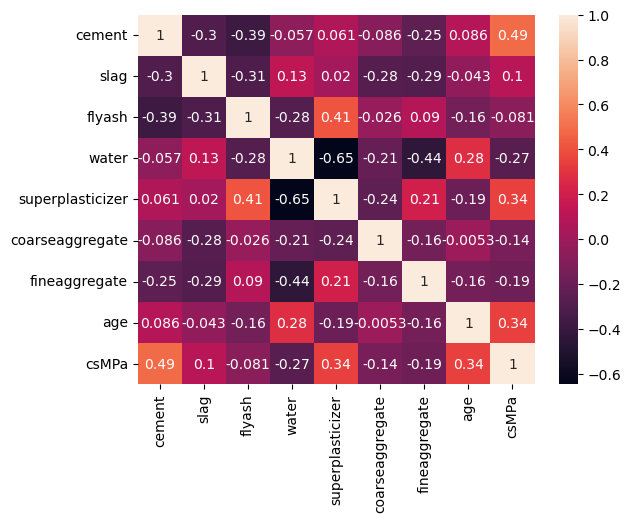

In [5]:
sns.heatmap(df.corr(), annot= True)
plt.show()

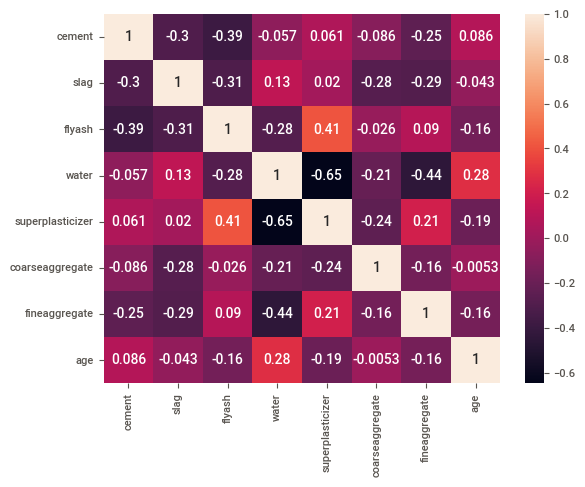

In [25]:
sns.heatmap(df.drop(columns= 'csMPa').corr(), annot= True)
plt.show()

# Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaleddf = pd.DataFrame(sc.fit_transform(df))
scaleddf.columns = df.columns
scaleddf.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


# Transformation

In [29]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformeddf = pt.fit_transform(df)
transformeddf = pd.DataFrame(transformeddf, columns= df.columns)
c.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,1.990163,-1.037627,-0.922988,-0.940422,-0.288928,0.844090,-1.196206,0.111440,2.327779
1,1.990163,-1.037627,-0.922988,-0.940422,-0.288928,1.041507,-1.196206,0.111440,1.511050
2,0.638865,1.024794,-0.922988,2.137632,-1.209254,-0.554529,-2.073221,2.122788,0.391423
3,0.638865,1.024794,-0.922988,2.137632,-1.209254,-0.554529,-2.073221,2.392576,0.435575
4,-0.716030,0.994908,-0.922988,0.468649,-1.209254,0.041364,0.639482,2.380231,0.615969


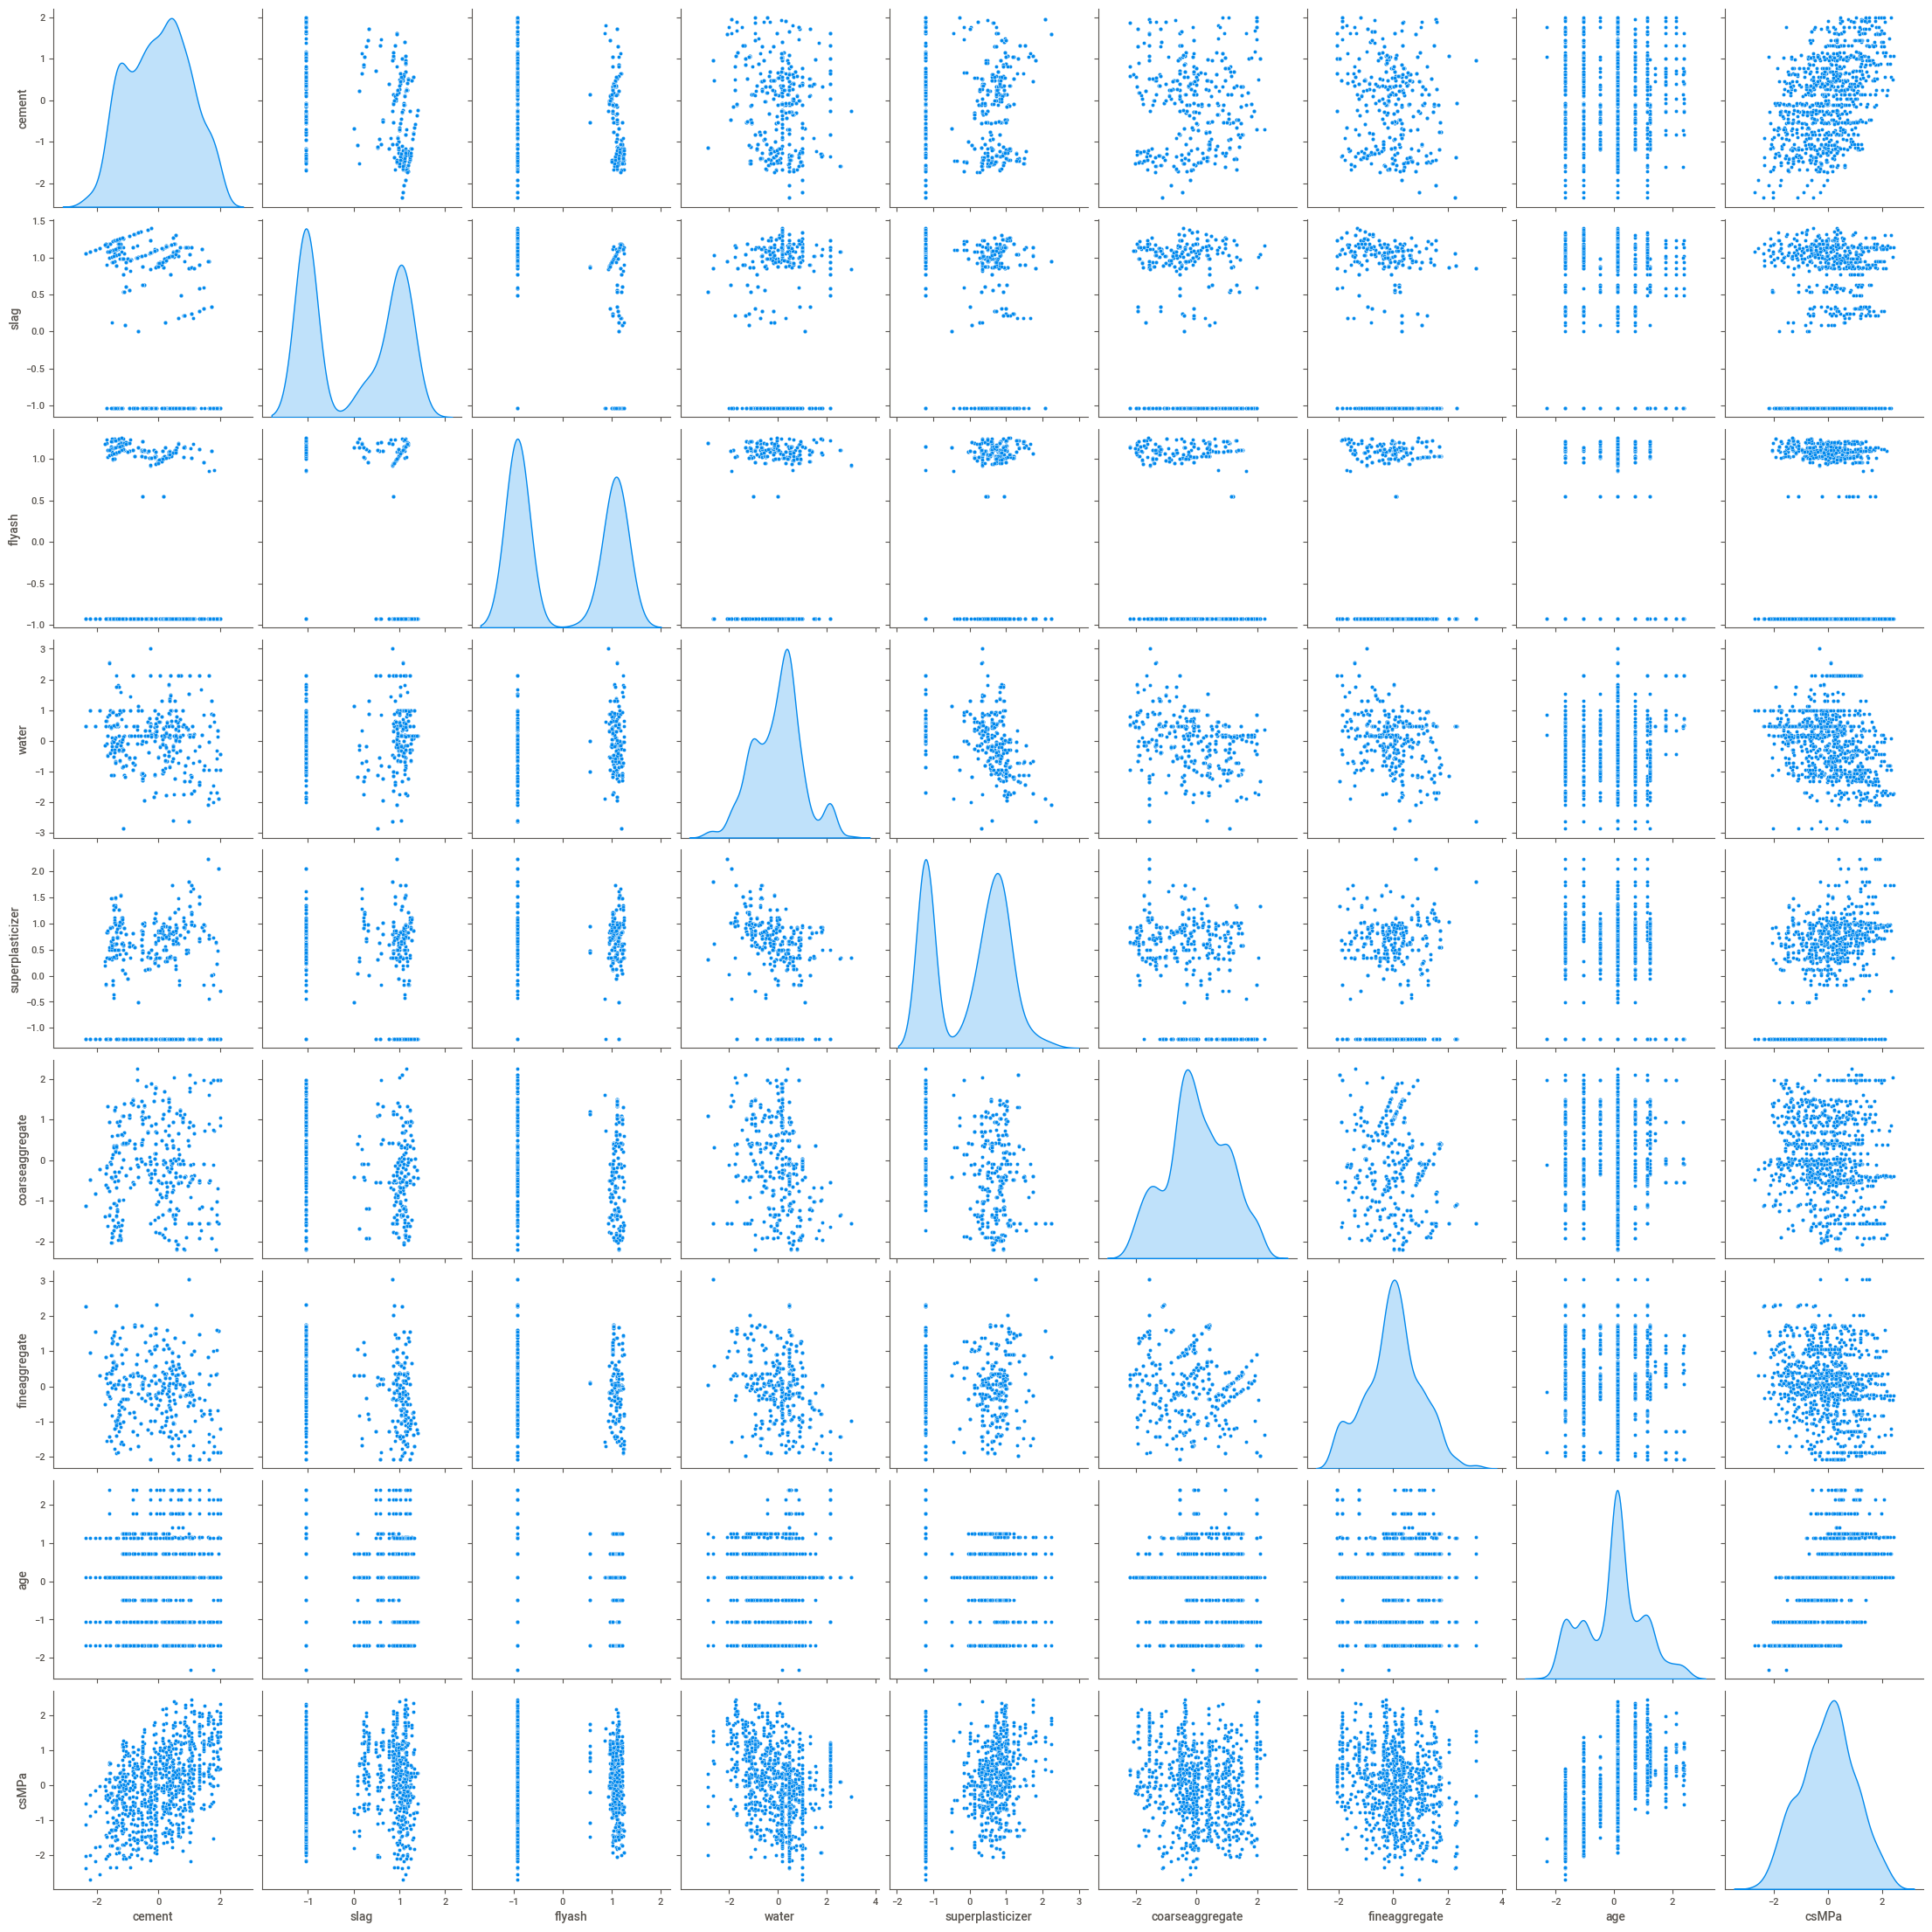

In [30]:
sns.pairplot(transformeddf, diag_kind='kde')

In [12]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
viz = AV.AutoViz(df)

2024-07-15 13:06:36,827 - INFO     - Executing shutdown due to inactivity...


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (1005, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
cement,float64,0.000000,NA,102.000000,540.000000,No issue
slag,float64,0.000000,NA,0.000000,359.400000,Column has 2 outliers greater than upper bound (356.25) or lower than lower bound(-213.75). Cap them or remove them.
flyash,float64,0.000000,NA,0.000000,200.100000,No issue
water,float64,0.000000,NA,121.800000,247.000000,Column has 15 outliers greater than upper bound (232.35) or lower than lower bound(127.15). Cap them or remove them.
superplasticizer,float64,0.000000,NA,0.000000,32.200000,Column has 10 outliers greater than upper bound (25.00) or lower than lower bound(-15.00). Cap them or remove them.
coarseaggregate,float64,0.000000,NA,801.000000,1145.000000,No issue
fineaggregate,float64,0.000000,NA,594.000000,992.600000,Column has 5 outliers greater than upper bound (969.05) or lower than lower bound(577.45). Cap them or remove them.
age,int64,0.000000,1,1.000000,365.000000,Column has 59 outliers greater than upper bound (129.50) or lower than lower bound(-66.50). Cap them or remove them.
csMPa,float64,0.000000,NA,2.330000,82.600000,Column has 8 outliers greater than upper bound (76.89) or lower than lower bound(-8.50). Cap them or remove them.


Number of All Scatter Plots = 36


2024-07-15 13:06:41,010 - INFO     - Executing shutdown...
2024-07-15 13:06:41,021 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [15]:
!pip install dtale
import dtale
import pandas as pd
d = dtale.show(df)
d.open_browser()

  Using cached dash_colorscales-0.0.4-py3-none-any.whl
  Using cached dash_daq-0.5.0-py3-none-any.whl
  Using cached Flask_Compress-1.15-py3-none-any.whl.metadata (8.4 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl.metadata (15 kB)
  Using cached squarify-0.4.3-py3-none-any.whl.metadata (540 bytes)
  Using cached strsimpy-0.2.1-py3-none-any.whl.metadata (20 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached flask_ngrok-0.0.25-py3-none-any.whl.metadata (1.8 kB)
  Using cached dash_bootstrap_components-1.3.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
   ---------------------------------------- 0.0/14.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/14.

In [9]:
#Basic Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df.drop('csMPa',axis=1)
y=df[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20, random_state=10)

lr = LinearRegression()
lr.fit(Xtrain,ytrain)

print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.594517569449642
Testing R2
0.6422366176315424


In [18]:
X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [19]:
lr.coef_

array([[ 0.12226049,  0.10551064,  0.09218552, -0.15212926,  0.25469802,
         0.02128236,  0.02197247,  0.11598932]])

# Pipelines

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipe = Pipeline((
("sc",StandardScaler()),
("lr", LinearRegression()),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)

print("Average R2")
print(np.mean(scoresdt))

Training R2
0.5945175694496421
Testing R2
0.6422366176315424
[0.61801076 0.5083383  0.601178   0.6384568  0.61446367 0.55268379
 0.62116016 0.67112131 0.50908879 0.45879618]
Average R2
0.5793297753900774


In [40]:
# PolynomialFeatures

from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline((
("poly",PolynomialFeatures(degree=3)),
("sfm",SelectFromModel(estimator=RandomForestRegressor(),max_features=90)),
("lr", LinearRegression()),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.6696282205891744
Testing R2
0.7030186001108416


In [ ]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

pipe = Pipeline((
("dtr", DecisionTreeRegressor(max_depth=10)),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9767176875905771
Testing R2
0.8732364575220963
[0.8670718  0.92045145 0.85688914 0.55861205 0.90450931 0.81628361
 0.79682967 0.86196329 0.79172464 0.83477425]
Average R2
0.8209109208968146


# Regularization Model

In [ ]:
#With Pipeline

from sklearn.linear_model import Lasso,Ridge

pipe = Pipeline((
("pt",PowerTransformer()),
("lr", Lasso(alpha=5)),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.400366594907996
Testing R2
0.4048550237350853
[0.42253404 0.38584176 0.36962928 0.34430595 0.33443445 0.3910601
 0.39201885 0.42375406 0.38099593 0.45247324]
Average R2
0.3897047643639856


In [ ]:
# PowerTransformer

pipe = Pipeline((
("pt", PowerTransformer()),
("poly",PolynomialFeatures(degree=3)),
("lr", LinearRegression())
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9454472537007774
Testing R2
0.9248452602875389
[0.88776231 0.84465574 0.79916504 0.83417566 0.7707194  0.9203704
 0.40352513 0.95483383 0.65737425 0.57759422]
Average R2
0.7650175991904457


# PCA Model

In [ ]:
from sklearn.decomposition import PCA

pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=3)),
("pca",PCA(n_components=100)),
("lr", LinearRegression()),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print()

print(pipe['pca'].explained_variance_ratio_)

Training R2
0.9129192202927401
Testing R2
0.8950209388852879
[0.8889499  0.88336175 0.85021005 0.72893918 0.91111757 0.87268196
 0.91575661 0.92936287 0.85905028 0.82254491]
Average R2
0.8661975093614952

[2.15280592e-01 1.09183333e-01 1.01954231e-01 5.92864375e-02
 5.55839677e-02 4.16287563e-02 2.98326803e-02 2.49288126e-02
 2.28337896e-02 2.03360687e-02 1.81909377e-02 1.66681798e-02
 1.57906802e-02 1.53152999e-02 1.37357094e-02 1.26471511e-02
 1.17074910e-02 1.11183245e-02 9.87953078e-03 9.48813929e-03
 9.27406870e-03 8.72082068e-03 8.20359178e-03 7.59015177e-03
 6.90003720e-03 6.49984384e-03 6.05806962e-03 5.78582638e-03
 5.60743248e-03 5.52983791e-03 5.24804478e-03 5.07042081e-03
 4.76715671e-03 4.48506992e-03 4.23765717e-03 4.14396010e-03
 3.88270902e-03 3.70491702e-03 3.58224192e-03 3.34361343e-03
 3.30874147e-03 3.09712240e-03 3.04309560e-03 2.88541661e-03
 2.75966284e-03 2.54243489e-03 2.53132283e-03 2.47911380e-03
 2.33108193e-03 2.19089690e-03 2.11196836e-03 2.03325493e-03
 1

In [ ]:
# DecisionTreeRegressor with PowerTransformer

pipe = Pipeline((
("pt",PowerTransformer()),
("lr", DecisionTreeRegressor(max_depth=20)),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9968823376499383
Testing R2
0.7836050454210306
[0.69410853 0.80544906 0.75096574 0.78711754 0.87106456 0.8860759
 0.84511556 0.86618288 0.87010918 0.83516369]
Average R2
0.8211352643494381


In [ ]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline((
("rfr", RandomForestRegressor(n_estimators=200,random_state=10)),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9845267622955424
Testing R2
0.9220530902702947
[0.9020328  0.9296384  0.91840761 0.73954917 0.91616853 0.89726903
 0.90132621 0.92512011 0.90951474 0.9039966 ]
Average R2
0.8943023205600831


In [ ]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

pipe = Pipeline((
#("pt",PowerTransformer()),
("gbr", GradientBoostingRegressor(n_estimators=1500)),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9927791355401739
Testing R2
0.9429121083307876
[0.93470484 0.94893304 0.93794847 0.7914136  0.93028301 0.94583299
 0.94869327 0.96120263 0.92275758 0.89757368]
Average R2
0.9219343121120571


In [ ]:
pipe['gbr'].estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)]],
      dtype=object)

In [ ]:
tree1 = pipe['gbr'].estimators_[1][0]
print(tree1)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x27E5E640840)


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree1,out_file = 'tree.dot',feature_names=Xtrain.columns)

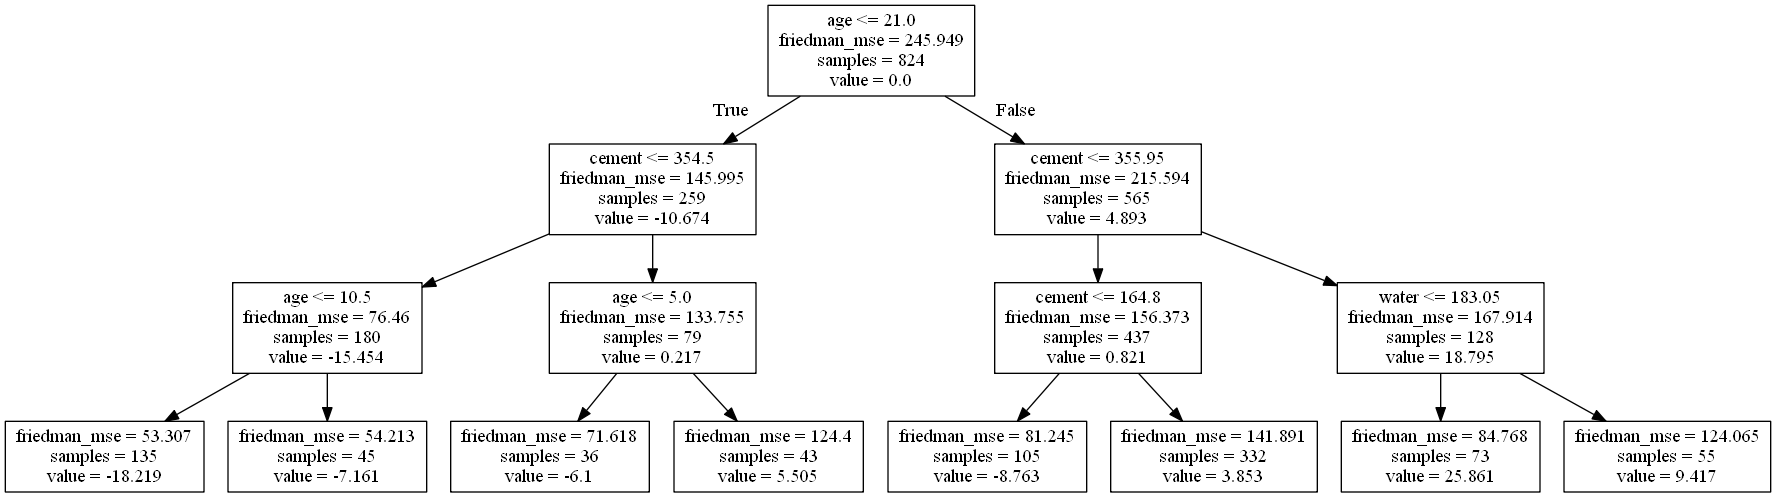

In [ ]:
from IPython.display import Image
Image(filename='tree.png')

In [ ]:
# AdaBoostRegressor

from sklearn.ensemble import AdaBoostRegressor

pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", AdaBoostRegressor(n_estimators=10,base_estimator=LinearRegression(),random_state=10)),
))

pipe.fit(Xtrain,ytrain)

print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6142957558574607
Testing R2
0.5869666439743113
[0.71313474 0.56300258 0.6046258  0.38858946 0.61876149 0.64043809
 0.61862094 0.72828601 0.55533087 0.5825105 ]
Average R2
0.6013300480615988


# Validation Curve

Automatically created module for IPython interactive environment


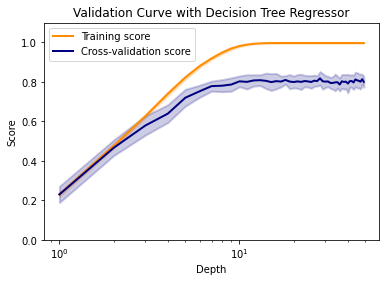

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), Xtrain, ytrain, param_name="max_depth", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


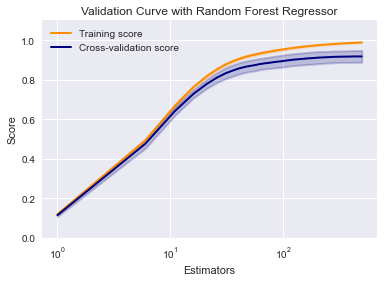

In [ ]:
print(__doc__)

param_range = np.arange(1,500,5)
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), Xtrain, ytrain, param_name="n_estimators", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
# Hyperparameter Tuning with Pipeline

from sklearn.model_selection import GridSearchCV

pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures()),
("rfe",RFE(estimator=LinearRegression())),
("lr", LinearRegression()),
))

param_grid = {
    'poly__degree' : [1,2,3],
    'rfe__n_features_to_select' : [10,20,30,40,50,60,70,80,90,100]
}

search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('pt', PowerTransformer()),
                                       ('poly', PolynomialFeatures()),
                                       ('rfe',
                                        RFE(estimator=LinearRegression())),
                                       ('lr', LinearRegression()))),
             param_grid={'poly__degree': [1, 2, 3],
                         'rfe__n_features_to_select': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]})

In [ ]:
search.best_params_

{'poly__degree': 2, 'rfe__n_features_to_select': 50}

In [ ]:
#Performance on the CV set
search.best_score_

0.8613965128762686

In [ ]:
#Performance on the test set
search.score(Xtest,ytest)

0.8693185642957081

In [ ]:
search.cv_results_

{'mean_fit_time': array([0.02912769, 0.0245533 , 0.03274765, 0.02935433, 0.02304111,
        0.02901063, 0.03297901, 0.03337545, 0.04610639, 0.03128219,
        0.0730267 , 0.06309309, 0.05221815, 0.03081393, 0.03979473,
        0.03735862, 0.02482791, 0.02580738, 0.03803167, 0.03500018,
        0.5265492 , 0.5425559 , 0.4781322 , 0.4909399 , 0.63358698,
        0.56907072, 0.43648233, 0.40564003, 0.40441236, 0.40242906]),
 'std_fit_time': array([0.00426181, 0.00286834, 0.00323812, 0.00777878, 0.00219638,
        0.00641571, 0.00473929, 0.00660679, 0.00545866, 0.00251413,
        0.01023606, 0.00634208, 0.00884402, 0.00226992, 0.00873202,
        0.00338882, 0.00326672, 0.00439331, 0.00524374, 0.00589772,
        0.09532761, 0.0807928 , 0.02322797, 0.02967078, 0.05036027,
        0.08405812, 0.03453526, 0.04113127, 0.04447265, 0.0711669 ]),
 'mean_score_time': array([0.00413389, 0.00308623, 0.00541291, 0.00338774, 0.00309529,
        0.00401368, 0.0043808 , 0.00458703, 0.00827332, 0.00

In [ ]:
# Hyperparameter Tuning with Pipeline

pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures()),
("pt",PowerTransformer()),
("pca",PCA()),
("xb",GradientBoostingRegressor())
))
param_grid = {
    'poly__degree' : [2,3],
    'pca__n_components' : [30,40],
    'xb__n_estimators' : [10,20,30,40,50]
}
search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('sc', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('pt', PowerTransformer()),
                                       ('pca', PCA()),
                                       ('xb', GradientBoostingRegressor()))),
             param_grid={'pca__n_components': [30, 40], 'poly__degree': [2, 3],
                         'xb__n_estimators': [10, 20, 30, 40, 50]})

In [ ]:
search.best_params_

{'pca__n_components': 30, 'poly__degree': 2, 'xb__n_estimators': 50}

In [ ]:
#Performance on the CV set
search.best_score_

0.7839162400457855

In [ ]:
#Performance on the test set
search.score(Xtest,ytest)

0.7512943788514964

In [ ]:
search.cv_results_

{'mean_fit_time': array([0.19096241, 0.23326526, 0.29194255, 0.36161704, 0.3772058 ,
        0.44930754, 0.51126919, 0.55314813, 0.60268068, 0.62530851,
        0.21797576, 0.27168489, 0.33744488, 0.38683052, 0.44160566,
        0.46298795, 0.54260454, 0.6051167 , 0.64258132, 0.70217381]),
 'std_fit_time': array([0.01977034, 0.03172169, 0.0144781 , 0.02762579, 0.01761062,
        0.0189252 , 0.02721113, 0.02039415, 0.03154639, 0.01267028,
        0.03522738, 0.03030187, 0.02506706, 0.02545423, 0.02951777,
        0.01758511, 0.00703823, 0.02472447, 0.0121282 , 0.01551998]),
 'mean_score_time': array([0.00817785, 0.00678358, 0.00848937, 0.00620499, 0.00610118,
        0.01736364, 0.01526794, 0.01751823, 0.01197186, 0.01138163,
        0.00997777, 0.00738616, 0.00668197, 0.00527825, 0.00590253,
        0.01695728, 0.01372294, 0.01255779, 0.01203427, 0.01151824]),
 'std_score_time': array([0.00171583, 0.00146544, 0.00115987, 0.00083934, 0.00067351,
        0.00358862, 0.00255275, 0.003081

In [ ]:
#Confidence Interval Of the Accuracy

import scipy.stats as stats

pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pt",PowerTransformer()),
("pca",PCA()),
("lr", GradientBoostingRegressor())
))

scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))

#Confidence Interval
xbar = np.mean(scoresdt)
n=10
s=np.std(scoresdt,ddof=1)
se=s/np.sqrt(n)
stats.t.interval(0.95,df=9,loc=xbar,scale=se)

[0.8370562  0.88425871 0.90936244 0.84781201 0.89176156 0.88844048
 0.87243057 0.82535118 0.86053001 0.85529928]
Average R2
0.8672302448488365
SD of accuracy
0.025243673981267152


(0.8481951922119625, 0.8862652974857105)

# Model Comparison

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,VotingRegressor
from sklearn import model_selection

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=1000)
gb = GradientBoostingRegressor(n_estimators=1500)
vr = VotingRegressor(estimators = [('lr',lr),('dt', dt)])

models = []
models.append(('Linear Regression',lr))
models.append(('Decision Tree Regression',dt))
models.append(('Random Forest Regression',rf))
models.append(('Gradient Boosting Regression',gb))
models.append(('Voting Regressor',vr))

In [10]:
# evaluate each model in turn

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)

Linear Regression: 0.607821 (0.064878)
Decision Tree Regression: 0.795825 (0.038465)
Random Forest Regression: 0.898002 (0.017361)
Gradient Boosting Regression: 0.918077 (0.020563)
Voting Regressor: 0.821471 (0.031911)


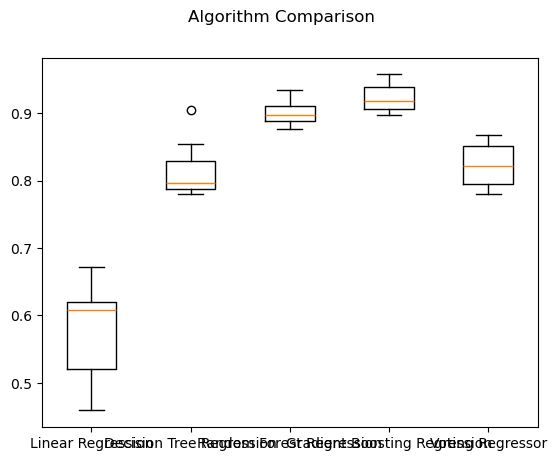

In [11]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [44]:
results

[array([0.61801076, 0.5083383 , 0.601178  , 0.6384568 , 0.61446367,
        0.55268379, 0.62116016, 0.67112131, 0.50908879, 0.45879618]),
 array([0.83013489, 0.81365505, 0.75186283, 0.79587888, 0.91597101,
        0.78557155, 0.82009973, 0.84198981, 0.77010704, 0.78416654]),
 array([0.92094919, 0.87958808, 0.89883862, 0.87743638, 0.93455573,
        0.88924503, 0.89945588, 0.91471084, 0.88418394, 0.90346436]),
 array([0.95745741, 0.92072432, 0.89802437, 0.9180801 , 0.95465724,
        0.90205452, 0.92250592, 0.94393971, 0.91005613, 0.90856685]),
 array([0.85312995, 0.79484758, 0.77770038, 0.85796662, 0.86311592,
        0.8052048 , 0.8304243 , 0.85820869, 0.79848974, 0.78265299])]